In [1]:
# 📊 Procesamiento y visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# 🗃️ Conexión a bases de datos
import pyodbc
from sqlalchemy import create_engine

# # 🤖 Inteligencia Artificial / OpenAI
# import openai
# from openai import OpenAI

# 🧰 Utilidades del sistema
import os
import re
import base64
# from dotenv import load_dotenv

# 📓 Entorno Jupyter Notebook
import nbformat
from IPython.display import display, Markdown

# 🌐 Web scraping y análisis de HTML
from bs4 import BeautifulSoup

# 📝 Conversión y renderizado de Markdown
import markdown2



In [2]:
# # Ruta al archivo .env (ajusta si tu archivo está en otra carpeta)
# load_dotenv("pass.env")
# # Acceder a las variables
# openai.api_key = os.getenv("key")
# assistant_id = os.getenv("assistant").strip()
# # (Opcional) Verifica que se cargó correctamente (no muestres en producción)
# print("🔐 Clave cargada:", openai.api_key[:10] + "...")

# client = OpenAI(api_key=openai.api_key)
# thread = client.beta.threads.create()

In [3]:
# Función para guardar gráficos automáticamente
def guardar_grafico(fig, idx):
    output_dir = "maquetas/img"
    os.makedirs(output_dir, exist_ok=True)
    ruta = os.path.join(output_dir, f"grafico_{idx}.png")
    fig.savefig(ruta, dpi=150, bbox_inches='tight')
    print(f"✅ Guardado automático: {ruta}")

In [4]:
# Consulta SQL para extraer las columnas requeridas
sql_query = """
SELECT "Código", "Nombre Ejecutivo Técnico"
FROM innova_sgp_Carga.dbo.snapshot_proyectos
WHERE Gerencia='Innovación';
"""

# Establecer la cadena de conexión a la base de datos SQL Server
connection_string = (
    "Driver={ODBC Driver 18 for SQL Server};"
    "Uid=user_seg;Pwd=user_seg;"
    "Server=ddssql11-avs\\orion;Port=1972;"
    "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
)

# Conectar a la base de datos
con = pyodbc.connect(connection_string, timeout=10)

# Ejecutar la consulta y guardar el resultado en un DataFrame
datos_proyecto = pd.read_sql_query(sql_query, con)

# Limpiar los datos en el DataFrame
datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
datos_proyecto = datos_proyecto.applymap(lambda x: None if x == "" or x == "NA" else x)

# Renombrar las columnas para que sigan las convenciones de nombres en Python
datos_proyecto.columns = datos_proyecto.columns.str.replace(" ", "_").str.replace("ñ", "n")

con.close()

# Ver el resultado
print(datos_proyecto)

c:\Users\esteban.berrios\AppData\Local\miniconda3\envs\scraping\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


              Código Nombre_Ejecutivo_Técnico
0       14IEAT-26985                     None
1       13PDTR-26659                     None
2            PI-2701                     None
3      24IRRM-267237                     None
4      24IRRM-267238                     None
...              ...                      ...
55762    19SN-123516       YESSENNIA ESPINOZA
55763    19SN-123624       YESSENNIA ESPINOZA
55764    23SN-242036       YESSENNIA ESPINOZA
55765  23IATS-246659       YESSENNIA ESPINOZA
55766   23PPT-254190       YESSENNIA ESPINOZA

[55767 rows x 2 columns]


In [5]:
# Guarda en un dataframe el resultado de datos_proyecto
df = datos_proyecto.copy()

In [6]:
df = df[df["Nombre_Ejecutivo_Técnico"].isin([
    "JEREMY ANTONIO SALAS VENEGAS", 
    "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
    "MARIA JOSE MORAGA CASTRO",
    "MARTA ESTHER  MINA AVENDANO", 
    "JUAN CARLOS CASTRO CABEZAS",
    "BARBARA SOL PARRAGUE GUZMAN", 
    "PAULA CAMILA DURÁN ABURTO",
    "JAIME TORRES MUÑOZ", 
    "Hugo Jara Vargas",
    "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
    "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
    "JAVIERA DEL PILAR GOMEZ MURUA", 
    "JUAN MARTINEZ F.", 
    "PABLO GAETE HALLER",
    "CHRISTOPHER ANDRES VIVANCO BARRA", 
    "Lisette Espinoza", 
    "JUAN PABLO ALVAREZ CERECEDA",
    "SEBASTIAN  JILBERTO", 
    "YESSENNIA ESPINOZA", 
    "ALEJANDRO  LEMUS",
    "JAIME TORRES MUÑOZ", 
    "ANDRES SALVADOR LEAL VILCHES",
])]

In [7]:
# resetea el indice al dataframe df
df.reset_index(drop=True, inplace=True)
df

,Código,Nombre_Ejecutivo_Técnico
0,21CV2-183318,ALEJANDRO LEMUS
1,22CYE-201879,ALEJANDRO LEMUS
2,22CYE2-214166,ALEJANDRO LEMUS
3,22CYE2-214011,ALEJANDRO LEMUS
4,22CYE-201565,ALEJANDRO LEMUS
...,...,...
11182,19SN-123516,YESSENNIA ESPINOZA
11183,19SN-123624,YESSENNIA ESPINOZA
11184,23SN-242036,YESSENNIA ESPINOZA
11185,23IATS-246659,YESSENNIA ESPINOZA


In [8]:
# Generar un dataframe a partir de esta ruta de acceso "C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\General\Reconfiguraciones\BD Reconfiguraciones 2024.xlsx" y que solo se lea la hoja de trabajo "BD Reconfiguraciones 2024"
df_reconfiguraciones = pd.read_excel(
    r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reconfiguraciones\BD Reconfiguraciones 2024.xlsx",
    sheet_name="BBDD Reconfiguraciones"
)

c:\Users\esteban.berrios\AppData\Local\miniconda3\envs\scraping\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [9]:
# Eliminar las filas que tengan la columna vacia "Código Proyecto"
df_reconfiguraciones = df_reconfiguraciones[df_reconfiguraciones["Código Proyecto"].notna()]

In [10]:
#Obtener las siguientes columnas del dataframe df_reconfiguraciones
# "Código Proyecto", "Tipo Notificación", "N° Oficialización", "Fecha", "Año", "Instrumento", "Ejecutivo MC", "Situación (uso interno MC)", "Casuisticas errores en solicitudes"

df_reconfiguraciones = df_reconfiguraciones[
    [
        "Código Proyecto",
        "Tipo Notificación",
        "N° Oficialización",
        "Fecha",
        "Año",
        "Instrumento",
        "Ejecutivo MC",
        "Situación (uso interno MC)",
        "Casuisticas errores en solicitudes"
    ]
]

In [11]:
df_reconfiguraciones

,Código Proyecto,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
0,21CVID2-184000,Reitemización,12096.0,2023-06-27,2023.0,Crea y Valida,MC,LISTA,Falta información adicional RRHH nuevos
1,21CVC2-183593,Reitemización y Reprogramación,15251.0,2023-08-21,2023.0,Crea y Valida,KARY,RECHAZAR SOLICITUD,NaN
2,22CVID-206781,Reitemización y Reprogramación,15376.0,2023-08-23,2023.0,Crea y Valida,CARO,FINALIZADA,NaN
3,21CVID-171995,Reitemización y Reprogramación,15798.0,2023-08-30,2023.0,Crea y Valida,CARO,FINALIZADA,NaN
4,22CVC-206581,Reitemización y Reprogramación,16870.0,2023-09-15,2023.0,Crea y Valida,ESTEBAN,FINALIZADA,Valores del presupuesto ya rendidos sin posibi...
...,...,...,...,...,...,...,...,...,...
582,24CVI-264654,Reitemización,10052.0,2025-06-05,2025.0,Crea y Valida,NaN,PROCESAR,NaN
583,23CVI2-251733,Rectifica,10051.0,2025-06-05,2025.0,Crea y Valida,ESTEBAN,PROCESADA,NaN
584,24CVIS-255935,Reitemización,10059.0,2025-06-05,2025.0,Crea y Valida,NaN,PROCESAR,NaN
585,24CVIS-255890,Reitemización,10058.0,2025-06-05,2025.0,Crea y Valida,NaN,PROCESAR,NaN


In [12]:
df_reporte = pd.merge(df,df_reconfiguraciones,left_on='Código',right_on='Código Proyecto',how='left'
)

In [13]:
df_reporte.drop(columns=['Código Proyecto'], inplace=True)

In [14]:
df_reporte

,Código,Nombre_Ejecutivo_Técnico,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
0,21CV2-183318,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,22CYE-201879,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,22CYE2-214166,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,22CYE2-214011,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,22CYE-201565,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11425,19SN-123516,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
11426,19SN-123624,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
11427,23SN-242036,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
11428,23IATS-246659,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [15]:
# Eliminar las filas que tengan la columna vacia "Código Proyecto"
df_reporte = df_reporte[df_reporte["N° Oficialización"].notna()]

In [16]:
df_reporte

,Código,Nombre_Ejecutivo_Técnico,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
5,22CYE2-214055,ALEJANDRO LEMUS,Reitemización y Reprogramación,6378.0,2024-05-07,2024.0,Consolida y Expande,KARY,FINALIZADA,NaN
6,22CYE2-214055,ALEJANDRO LEMUS,Reitemización,7725.0,2024-05-16,2024.0,Consolida y Expande,MC,LISTA,NaN
101,22CYE2-214063,ALEJANDRO LEMUS,Reitemización y Reprogramación,1143.0,2024-01-24,2024.0,Consolida y Expande,MC,LISTA,NaN
104,23CVC-245703,BARBARA SOL PARRAGUE GUZMAN,Reitemización,20554.0,2024-11-14,2024.0,Crea y Valida,ESTEBAN,FINALIZADA,NaN
105,23CVC-245703,BARBARA SOL PARRAGUE GUZMAN,Reprogramación,358.0,2025-01-08,2025.0,Crea y Valida,ESTEBAN,FINALIZADA,NaN
...,...,...,...,...,...,...,...,...,...,...
11351,24CVC-265029,PAULA CAMILA DURÁN ABURTO,Reitemización,7699.0,2025-04-21,2025.0,Crea y Valida,ESTEBAN,NO APLICA,Incidencias en el cálculo presupuestario
11352,24CVC-265029,PAULA CAMILA DURÁN ABURTO,Reitemización,7773.0,2025-04-22,2025.0,Crea y Valida,ESTEBAN,NO APLICA,NaN
11353,24CVC-265029,PAULA CAMILA DURÁN ABURTO,Reitemización,9950.0,2025-06-04,2025.0,Crea y Valida,ESTEBAN,PROCESAR,NaN
11355,24CVI-264699,PAULA CAMILA DURÁN ABURTO,Reitemización,5174.0,2025-03-25,2025.0,Crea y Valida,ESTEBAN,NO APLICA,Incidencias en el cálculo presupuestario


In [17]:
# En la columna "Nombre_Ejecutivo_Técnico" formatear con la primera letra en mayúscula y el resto en minúscula
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.title()
# Si encuentra la palabra "Diego Villalobos Ramos Villalobos Ramos" en la columna "Nombre_Ejecutivo_Técnico" reemplazar por "Diego Villalobos Ramos"
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Diego Ignacio Villalobos Ramos Villalobos Ramos", "Diego Villalobos Ramos", regex=False)
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Sebastian Jilberto", "No tiene ejecutivo asignado", regex=False)
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Yessenia Espinoza", "No tiene ejecutivo asignado", regex=False)
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Felipe Francisco Aandueza Del Campo", "No tiene ejecutivo asignado", regex=False)

# Si encuentra la palabra "LISTA" en la columna "NomSituación (uso interno MC)" reemplazar por "FINALIZADA"
df_reporte["Situación (uso interno MC)"] = df_reporte["Situación (uso interno MC)"].str.replace("LISTA", "FINALIZADA", regex=False)


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\136293137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.title()
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\136293137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Diego Ignacio Villalobos Ramos Villalobos Ramos", "Diego Villalobos Ramos", regex=F

In [18]:
# import time

# # Guardar el DataFrame como CSV temporal
# ruta_csv = "df_reporte.csv"
# df_reporte.to_csv(ruta_csv, index=False)

# # Subir el archivo al Assistant
# uploaded_file = client.files.create(
#     file=open(ruta_csv, "rb"),
#     purpose="assistants"
# )

# # Esperar un momento para asegurar que el archivo esté listo
# time.sleep(2)

# # Enviar el archivo y un mensaje solicitando análisis general
# mensaje_df = client.beta.threads.messages.create(
#     thread_id=thread.id,
#     role="user",
#     content=(
#         "Hola, te adjunto el archivo 'df_reporte.csv', que contiene información de reconfiguraciones "
#         "de proyectos. Por favor analiza su estructura, columnas principales, y entrega un resumen general "
#         "de los datos antes de que te haga consultas específicas."
#     ),
#     attachments=[
#         {
#             "file_id": uploaded_file.id,
#             "tools": [{"type": "code_interpreter"}]
#         }
#     ]
# )

# # Ejecutar el análisis del Assistant
# run = client.beta.threads.runs.create(
#     thread_id=thread.id,
#     assistant_id=assistant_id,
# )

# # Esperar a que el análisis esté completo
# print("⏳ Esperando que el Assistant complete la ejecución...")
# while True:
#     estado = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
    
#     if estado.status == "completed":
#         print("✅ Análisis completado.")
#         break
#     elif estado.status == "failed":
#         print("❌ Falló la ejecución del Assistant.")
#         if estado.last_error:
#             print("💥 Detalle del error:", estado.last_error)
#         break
#     time.sleep(2)

# # Mostrar la respuesta del Assistant (si existe)
# mensajes = client.beta.threads.messages.list(thread_id=thread.id)
# for m in mensajes.data:
#     if m.role == "assistant":
#         print("📊 Resumen del Assistant:")
#         print(m.content[0].text.value)

In [19]:
# Descargar df_reporte en archivo csv
df_reporte.to_csv(r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reportería reconfiguraciones\df_reporte.csv", index=False)

## 🎯 Objetivo del Reporte

Este folleto visual tiene por finalidad ofrecer una visión estructurada y estratégica sobre los **procesos de reconfiguración de proyectos INNOVA** registrados en el sistema durante el período analizado. Para ello, se presentan **10 gráficos** y **3 tablas explicativas**, diseñados para facilitar la interpretación de datos complejos mediante recursos visuales y descripciones analíticas.

El objetivo central es analizar estos elementos de forma cruzada y complementaria, a fin de entregar insights estratégicos que permitan tomar decisiones informadas en torno a los siguientes ejes clave:

📈 **Evolución temporal de solicitudes**: detectar tendencias, estacionalidades y momentos críticos de mayor carga operativa.  
🧩 **Distribución por instrumento y ejecutivo**: identificar concentración de casos, perfiles especializados y oportunidades para balancear la gestión técnica.  
🧾 **Calidad técnico-administrativa**: observar la recurrencia de rectificaciones y revisar su impacto en la eficiencia de los procesos.  
❗ **Frecuencia y tipo de errores**: visibilizar las principales causas de rechazo o corrección, para fortalecer criterios de evaluación y lineamientos operativos.

Este enfoque integral busca no solo describir el comportamiento histórico de las reconfiguraciones, sino también entregar evidencia útil para la mejora continua de los procesos de validación, seguimiento y gestión institucional.

---

## ✅ ¿Qué Puedes Consultar?

- 📈 ¿Cómo ha evolucionado el volumen de reconfiguraciones de enero 2024 a mayo 2025?  
- 🏷️ ¿Qué instrumentos o ejecutivos concentran la mayor carga operativa y cómo varía ese liderazgo?  
- 📅 ¿Cómo se distribuye la actividad mensual en 2025 y cuáles fueron los meses más críticos?  
- 📊 ¿Qué estados internos (PROCESAR, FINALIZADA, NO APLICA, etc.) dominan el flujo de tramitación?  
- ❌ ¿Cuáles son los tipos de notificación más frecuentes y su proporción en 2025?  
- ✅ ¿Cómo se compara la calidad documental (cartas con/sin errores) en 2025 vs. histórico?  
- ⚠️ ¿Qué patrones de errores destacan y dónde enfocar acciones preventivas?

📎 **Fuente de datos:** Registro consolidado de notificaciones de reconfiguración CORFO  
📅 **Cobertura temporal:** Enero 2024 – Mayo 2025  
📌 **Segmentos clave:** Instrumento, Ejecutivo Técnico, Tipo de Notificación, Situación Interna Mejora Continua

---

## 📊 Gráficos Incluidos

1. **Reconfiguraciones por Mes (Ene 2024 – May 2025):** Conteo mensual general.  
2. **Reconfiguraciones por Mes e Instrumento (Ene 2024 – May 2025):** Barras apiladas; instrumentos < 3 % agrupados como “Otros”.  
3. **Reconfiguraciones por Mes (2025):** Evolución mensual de enero a mayo de 2025.  
4. **Reconfiguraciones por Mes e Instrumento (2025):** Barras apiladas por tipo de instrumento en 2025.  
5. **Distribución por Instrumento (2025):** Gráfico circular; instrumentos < 2 % agrupados como “Otros”.  
6. **Cantidad por Ejecutivo Técnico (2025):** Carga operativa individual (enero–mayo).  
7. **Reconfiguraciones por Ejecutivo e Instrumento (2025):** Barras apiladas ejecutivo × instrumento.  
8. **Distribución por Tipo de Notificación (2025):** Gráfico circular; categorías < 5 % excluidas.  
9. **Reconfiguraciones por Situación Interna MC (2025):** Conteo por estado (PROCESAR, FINALIZADA, NO APLICA, etc.).  
10. **Distribución por Mes y Estado Interno (2025):** Barras agrupadas mes × situación (enero–mayo).

---

## 📋 Tablas Incluidas

1. **Tabla 1 – Cartas con vs. sin errores (Total)**  
2. **Tabla 2 – Cartas con vs. sin errores (2025)**  
3. **Tabla 3 – Tipos de errores identificados**  

### 1-. **Análisis mensual de reconfiguraciones de proyectos INNOVA (Ene 2024 – May 2025)**

#### 🗂️ **Descripción del análisis**

El gráfico presenta la cantidad total de solicitudes de reconfiguración de proyectos INNOVA, notificadas mensualmente desde enero 2024 hasta mayo 2025, según datos extraídos del archivo `df_reporte.csv`. Estas solicitudes pueden corresponder a reprogramaciones, reitemizaciones, suspensiones u otras modificaciones formales notificadas por ejecutivos técnicos a través de resoluciones.

#### 📅 **Meses con Mayor Actividad**

Los tres meses con mayor cantidad de reconfiguraciones notificadas son:

* **Noviembre 2024**: 55 notificaciones
* **Diciembre 2024**: 49 notificaciones
* **Mayo 2025**: 48 notificaciones
  📌 *Esto sugiere un pico importante al cierre del año 2024, seguido por un rebrote de actividad en mayo de 2025, posiblemente asociado a cierres de hitos de informe o ajustes post-ejercicio.*

#### 📉 **Tendencia Temporal**

Se observa un patrón oscilante a lo largo del período, con alzas pronunciadas en noviembre–diciembre 2024 y un nuevo repunte en mayo 2025. Estos ciclos podrían estar vinculados a:

* **Fechas de entrega de informes**: plazos de avance y continuidad técnica.
* **Procesos de auditoría interna**: verificaciones periódicas que generan solicitudes de ajuste.

> **Observación clave:** No hay una tendencia monotónica creciente o decreciente; más bien, la actividad se concentra en momentos puntuales del calendario institucional.


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\922948767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\922948767.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=rosados, ax=ax)


✅ Guardado automático: maquetas/img\grafico_1.png


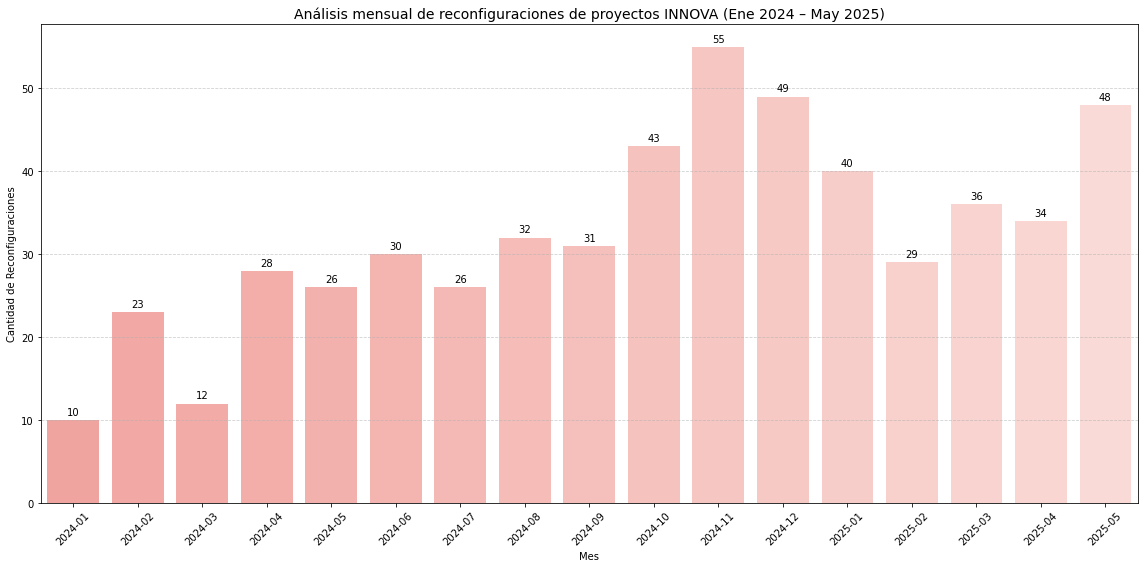

In [20]:
# --- Preparar datos
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte = df_reporte[df_reporte["Fecha"] >= "2024-01-01"]
df_reporte = df_reporte[df_reporte["Fecha"].dt.to_period("M").astype(str) != "2025-06"]
df_reporte['Mes'] = df_reporte['Fecha'].dt.to_period('M').astype(str)

reconfiguraciones_por_mes = df_reporte['Mes'].value_counts().sort_index()
df_plot = reconfiguraciones_por_mes.reset_index()
df_plot.columns = ['Mes', 'Cantidad']

# --- Generar gradiente de rosado CORFO
base_color = mcolors.to_rgb("#FD9893")
rosados = [mcolors.to_hex(tuple(min(1, c + i * 0.015) for c in base_color)) for i in range(len(df_plot))]

# --- Graficar
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=rosados, ax=ax)

# Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Títulos y estilo
plt.title("Análisis mensual de reconfiguraciones de proyectos INNOVA (Ene 2024 – May 2025)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Reconfiguraciones")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# ✅ Guardar gráfico
guardar_grafico(fig, 1)
plt.show()

### 2-. **Reconfiguraciones por mes y por instrumento**

#### 🎯 **Descripción del análisis**
El gráfico de barras apiladas expone la distribución mensual de solicitudes de reconfiguración de proyectos INNOVA, diferenciadas por tipo de instrumento. Se identifican los instrumentos más relevantes (aquellos con ≥ 3 % del total) y los de menor participación se agrupan bajo la categoría “Otros” para una visualización más clara.

#### 🔍 **Hallazgos principales**

#### 🥇 Instrumentos más activos por volumen
- **Crea y Valida**: 356 reconfiguraciones (67,2 % del total)  
  📌 Liderazgo sostenido que refleja una alta carga operativa en esta línea de financiamiento.

#### 📉 Instrumentos con caída o estabilidad
- **Capital Humano**:  
  - Peak de 15 notificaciones en diciembre 2024.  
  - Se estabiliza en 4 reconfiguraciones mensuales entre enero y marzo 2025.  
- **Consolida y Expande**:  
  - Baja participación, con entre 1 y 7 reconfiguraciones mensuales (pico de 7 en julio 2024).  
- **Gestión de la Innovación**:  
  - Marginal, con 0 a 3 casos mensuales (máximo de 3 en abril 2024).  
- **Innova Alta Tecnología**:  
  - Fluctúa entre 0 y 6 reconfiguraciones mensuales, con un repunte a 6 en mayo 2025.

#### 📌 **Relevancia de la categoría “Otros”**
- La categoría “Otros” registró entre 0 y 3 notificaciones mensuales, sin alcanzar las 5 en ningún mes, lo que confirma su participación menor y dispersa durante el período observado.






✅ Guardado automático: maquetas/img\grafico_2.png


<Figure size 1152x576 with 0 Axes>

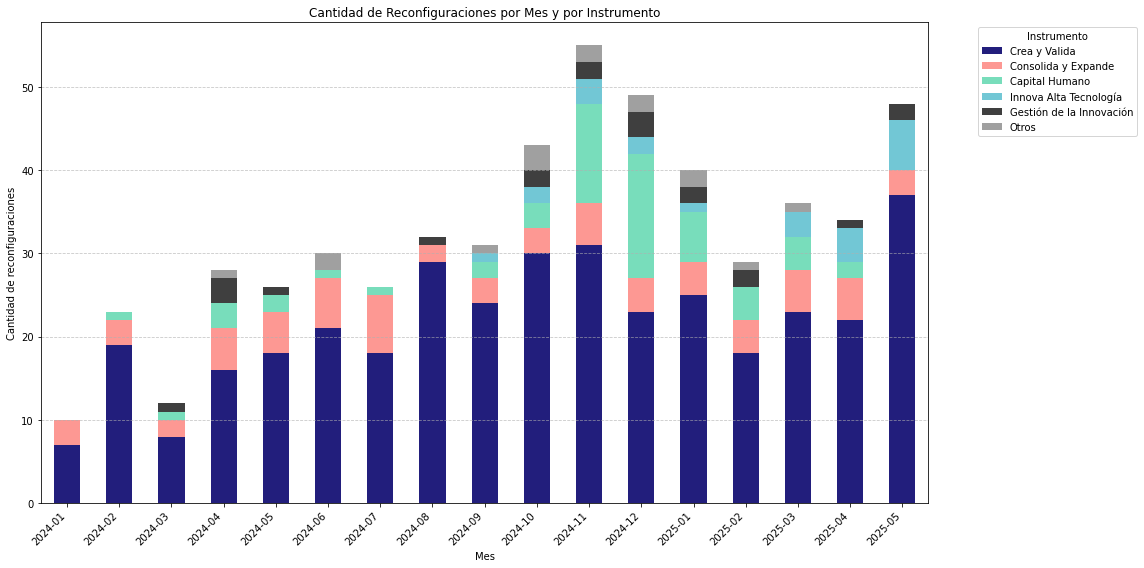

In [21]:
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte = df_reporte[df_reporte["Fecha"] >= "2024-01-01"]
df_reporte["Mes"] = df_reporte["Fecha"].dt.to_period("M").astype(str)
# Excluir abril 2025
df_reporte = df_reporte[df_reporte['Mes'] != '2025-06']

# Calcular % total por instrumento para agrupar los que son menores a 3%
porcentaje_instrumento = df_reporte["Instrumento"].value_counts(normalize=True)
instrumentos_principales = porcentaje_instrumento[porcentaje_instrumento >= 0.03].index.tolist()

# Reemplazar los instrumentos menores a 3% por "Otros"
df_reporte["Instrumento Agrupado"] = df_reporte["Instrumento"].apply(
    lambda x: x if x in instrumentos_principales else "Otros"
)

# Mapeo específico para mantener colores consistentes
color_mapeo = {
    "Crea y Valida": "#221E7C",
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"# Más contrastante que el celeste  # si aparece este también
}

# Crear tabla cruzada
tabla_instrumentos = pd.crosstab(df_reporte["Mes"], df_reporte["Instrumento Agrupado"])

# Ordenar columnas por frecuencia
orden_columnas = tabla_instrumentos.sum().sort_values(ascending=False).index.tolist()
tabla_instrumentos = tabla_instrumentos[orden_columnas]

# Aplicar colores en el mismo orden
colores_usados = [color_mapeo.get(col, "#CCCCCC") for col in tabla_instrumentos.columns]

# Graficar
plt.figure(figsize=(16, 8), facecolor='white')
tabla_instrumentos.plot(
    kind="bar",
    stacked=True,
    color=colores_usados,
    figsize=(16, 8)
)

plt.title("Cantidad de Reconfiguraciones por Mes y por Instrumento", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar
fig = plt.gcf()
guardar_grafico(fig, 2)
plt.show()

### 3-. **Reconfiguraciones por mes en 2025 (Ene – May 2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de columnas simples muestra el volumen total de reconfiguraciones de proyectos CORFO notificadas durante los primeros cinco meses de 2025. Se procesaron los datos del archivo `df_reporte.csv`, filtrando desde enero 2025 y excluyendo junio 2025. Cada barra corresponde al total de reconfiguraciones registradas en el mes indicado.

#### 📅 **Evolución de solicitudes en 2025**  
- **Mayo 2025**: 48 reconfiguraciones  
- **Enero 2025**: 40 reconfiguraciones  
- **Marzo 2025**: 36 reconfiguraciones  
- **Abril 2025**: 34 reconfiguraciones  
- **Febrero 2025**: 29 reconfiguraciones  

📌 *Mayo destaca como el mes con mayor carga operativa en 2025, posiblemente asociado a solicitudes próximas a períodos de rendición, mientras que febrero registra la menor actividad, posiblemente por feriados y procesos de planificación.*

#### 📌 **Observación clave**  
La distribución muestra un repunte notable en mayo, seguido de un descenso hacia febrero, sugiriendo ciclos operativos ligados a plazos de informes.


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\3352768386.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\3352768386.py:23: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)


✅ Guardado automático: maquetas/img\grafico_3.png


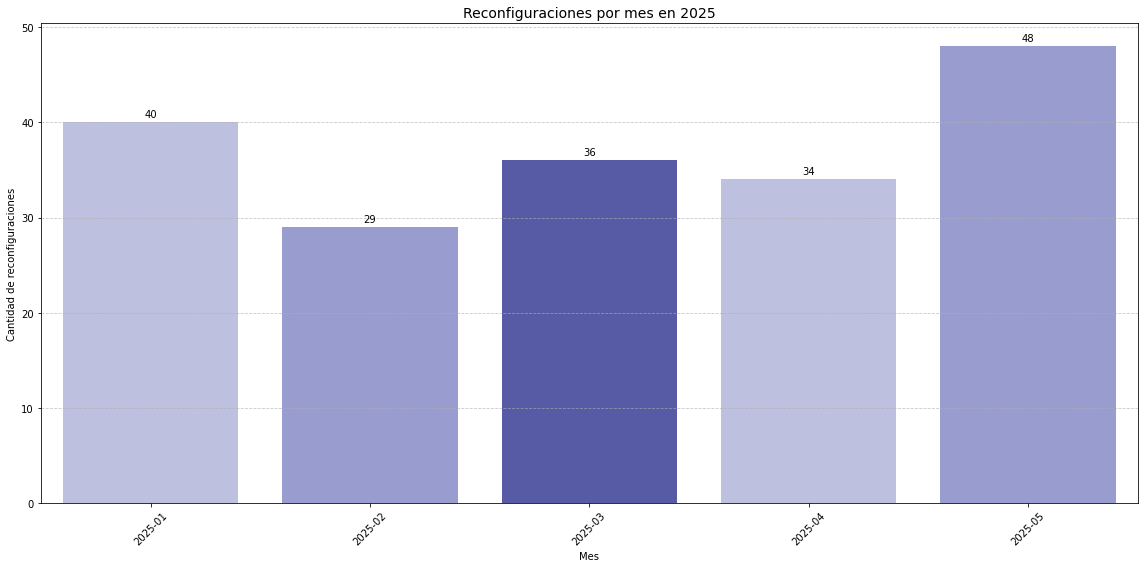

In [22]:
# Convertir la columna Fecha a datetime
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")

# Filtrar desde enero 2025 en adelante
df_reporte_2025 = df_reporte[df_reporte["Fecha"] >= "2025-01-01"].copy()

# Agrupar por mes y contar
df_reporte_2025['Mes'] = df_reporte_2025['Fecha'].dt.to_period("M").astype(str)

# Excluir mayo 2025
df_reporte_2025 = df_reporte_2025[df_reporte_2025['Mes'] != '2025-06']

# Conteo mensual
reconfiguraciones_por_mes = df_reporte_2025['Mes'].value_counts().sort_index()
df_plot = reconfiguraciones_por_mes.reset_index()
df_plot.columns = ['Mes', 'Cantidad']

# Paleta con más diferenciación
colores_meses_2025 = ["#B8BBE5", "#9094D8", "#4A4FB2"]

# Graficar
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)

# Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Reconfiguraciones por mes en 2025", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de reconfiguraciones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar
fig = ax.get_figure()
guardar_grafico(fig, 3)

plt.show()

### 4-. **Reconfiguraciones por mes y por instrumento (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras apiladas presenta la evolución mensual de las reconfiguraciones de proyectos CORFO durante los primeros cinco meses de 2025. Se agrupan las solicitudes por tipo de instrumento, clasificando en “Otros” aquellos con participación inferior al 3 %, para facilitar la lectura de las líneas principales.

La fuente de datos es el archivo `df_reporte.csv`, filtrando desde enero 2025 y excluyendo junio 2025. Cada barra muestra el total de reconfiguraciones por mes, distribuidas por instrumento con codificación de color institucional.

#### 🥇 **Instrumentos que lideran en 2025**  
- **Crea y Valida** aporta entre un **62 %** (febrero) y un **77 %** (mayo) del total mensual, evidenciando su rol estructural y la concentración de la carga administrativa en esta línea.

#### 🆕 **Nuevos actores relevantes**  
- **Innova Alta Tecnología**:  
  - 1 reconfiguración en enero  
  - 3 en marzo  
  - 4 en abril  
  - 6 en mayo  
  Aunque todavía es marginal, su aparición creciente sugiere nuevas adjudicaciones o ajustes tempranos en proyectos de alta tecnología.

#### 🌐 **Diversidad de instrumentos por mes**  
- **Enero 2025**: 6 instrumentos distintos  
- **Febrero 2025**: 5  
- **Marzo 2025**: 5  
- **Abril 2025**: 5  
- **Mayo 2025**: 4  


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\2603767335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte_2025["Mes"] = df_reporte_2025["Fecha"].dt.to_period("M").astype(str)


✅ Guardado automático: maquetas/img\grafico_4.png


<Figure size 1152x576 with 0 Axes>

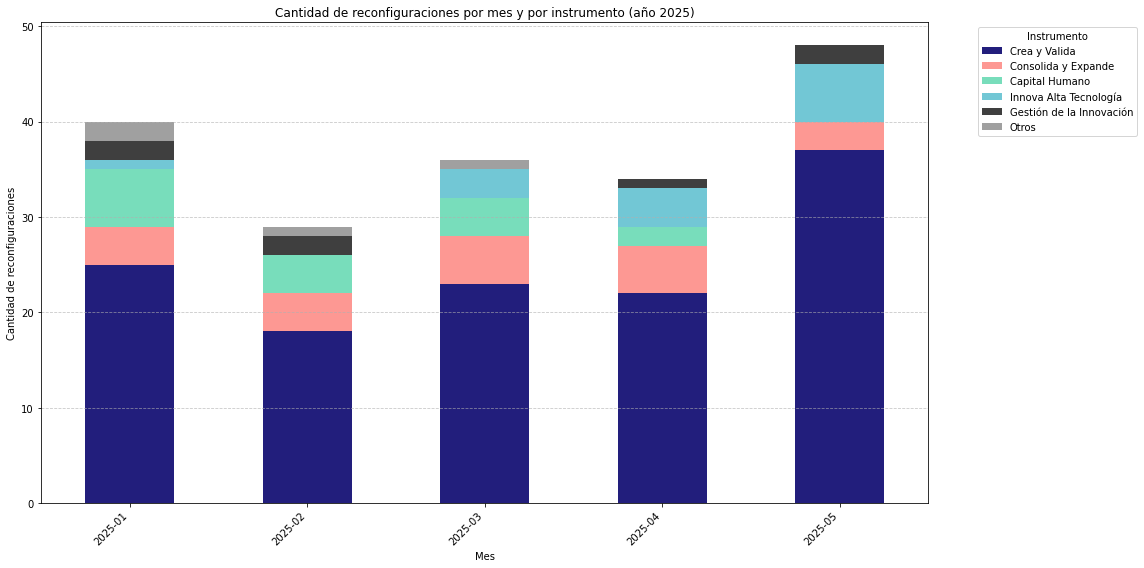

In [23]:
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte_2025 = df_reporte[df_reporte["Fecha"] >= "2025-01-01"]
df_reporte_2025["Mes"] = df_reporte_2025["Fecha"].dt.to_period("M").astype(str)

# Excluir abril 2025
df_reporte_2025 = df_reporte_2025[df_reporte_2025['Mes'] != '2025-06']

# Agrupamiento de instrumentos
porcentaje_instrumento = df_reporte_2025["Instrumento"].value_counts(normalize=True)
instrumentos_principales = porcentaje_instrumento[porcentaje_instrumento >= 0.03].index.tolist()

df_reporte_2025["Instrumento Agrupado"] = df_reporte_2025["Instrumento"].apply(
    lambda x: x if x in instrumentos_principales else "Otros"
)

# Tabla cruzada
tabla_instrumentos = pd.crosstab(df_reporte_2025["Mes"], df_reporte_2025["Instrumento Agrupado"])

# --- 🎨 Paleta de colores CORFO ajustada
color_mapeo = {
    "Crea y Valida": "#221E7C",
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"# Más contrastante que el celeste  # si aparece este también
}

# Ordenar columnas por frecuencia
orden_columnas = tabla_instrumentos.sum().sort_values(ascending=False).index.tolist()
tabla_instrumentos = tabla_instrumentos[orden_columnas]

# Colores ordenados
colores_usados = [color_mapeo.get(col, "#CCCCCC") for col in tabla_instrumentos.columns]

# --- 📊 Gráfico
plt.figure(figsize=(16, 8), facecolor='white')
tabla_instrumentos.plot(
    kind="bar",
    stacked=True,
    color=colores_usados,
    figsize=(16, 8)
)

plt.title("Cantidad de reconfiguraciones por mes y por instrumento (año 2025)", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar automáticamente
fig = plt.gcf()
guardar_grafico(fig, 4)

plt.show()

### 5-. **Distribución de instrumentos en 2025**

#### 🎯 **Descripción del análisis**  
El gráfico circular ilustra la distribución porcentual de las solicitudes de reconfiguración de proyectos INNOVA según el instrumento de financiamiento al que pertenecen, considerando únicamente el año 2025. Se calcularon las proporciones con base en el total de notificaciones registradas, agrupando bajo “Otros” todos los instrumentos cuya participación fue inferior al 2 %, para mantener la claridad visual.

#### 🥇 **Instrumento con mayor participación**  
- **Crea y Valida** concentra el **66.8 %** del total de reconfiguraciones en 2025, reafirmando su posición como línea estratégica clave en este período.

#### 🔍 **Conclusiones clave**  
- **Consolida y Expande**: 11.2 % (21 notificaciones)  
- **Capital Humano**: 8.6 % (16 notificaciones)  
- **Innova Alta Tecnología**: 7.5 % (14 notificaciones) — su presencia creciente refuerza el hallazgo del Gráfico 4 sobre su emergencia.  
- **Gestión de la Innovación**: 3.7 % (7 notificaciones)  
- **Otros**: 2.1 % (3 notificaciones) — participación menor pero agrupada para simplificar la visualización.

> **Observación:** La gran concentración en Crea y Valida indica una dependencia operativa fuerte de este instrumento, mientras que la aparición de Innova Alta Tecnología sugiere nuevas adjudicaciones o necesidades de ajuste en proyectos de alta tecnología.

#### 🧩 **Complementariedad con gráficos anteriores**  
Este gráfico refuerza lo planteado en el Gráfico 4: la dominancia de Crea y Valida mes a mes, y la incipiente relevancia de Innova Alta Tecnología. La vista agregada permite validar la sostenida concentración de las solicitudes en un reducido número de líneas de financiamiento.  

✅ Guardado automático: maquetas/img\grafico_5.png


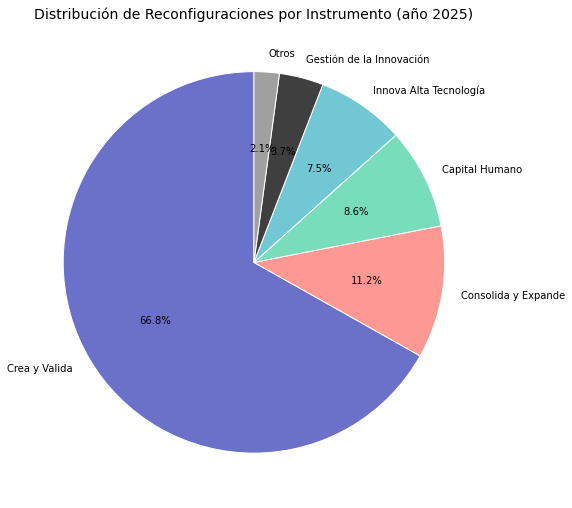

In [24]:
# Agrupar categorías con menos del 2% en "Otros"
conteo_instrumento = df_reporte_2025["Instrumento"].value_counts()
porcentajes = conteo_instrumento / conteo_instrumento.sum()

# Separar categorías principales y menores
principales = porcentajes[porcentajes >= 0.02]
otros = porcentajes[porcentajes < 0.02]

# Combinar
conteo_resumido = principales.copy()
conteo_resumido["Otros"] = otros.sum()

# 🎨 Paleta personalizada CORFO (ajustada)
color_mapeo_pie = {
        "Crea y Valida": "#6B70C8",  # 🔵 Más claro que #221E7C
        "Consolida y Expande": "#FD9893",
        "Capital Humano": "#78DDBB",
        "Gestión de la Innovación": "#3F3F3F",
        "Innova Alta Tecnología": "#72C7D5",
        "Otros": "#A0A0A0"
}

# Recalcular colores según las categorías actuales
colors = [color_mapeo_pie.get(cat, "#CCCCCC") for cat in conteo_resumido.index]

# Graficar pie chart actualizado
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.set_facecolor("white")

ax.pie(
        conteo_resumido,
        labels=conteo_resumido.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de Reconfiguraciones por Instrumento (año 2025)", fontsize=14)
plt.tight_layout()

# Guardar actualizado
guardar_grafico(fig, 5)

plt.show()

### 6-. **Reconfiguraciones por ejecutivo técnico (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras verticales muestra la cantidad total de solicitudes de reconfiguración gestionadas por cada ejecutivo técnico durante el año 2025 (enero a mayo). Los nombres largos se rotaron para facilitar la lectura y se aplicó un degradado de color basado en la paleta institucional CORFO.

#### 🔍 **Concentración y distribución**  
- **Total de reconfiguraciones 2025**: 187  
- **Top 3 ejecutivos** concentran **69** reconfiguraciones, es decir, el **37 %** del total:

📌 *La carga operativa está algo concentrada en estos perfiles, lo que podría generar riesgos de sobrecarga o cuellos de botella en la validación de reconfiguraciones.*

#### 🏗️ **Resto del equipo**  
- El restante **63 %** de las solicitudes (118 reconfiguraciones) está distribuido entre 13 ejecutivos técnicos, con valores que oscilan entre 1 y 14 reconfiguraciones cada uno.

> **Observación clave:** Identificar a los ejecutivos con mayor carga permite planificar redistribuciones o refuerzos para balancear el trabajo y garantizar tiempos de respuesta óptimos en la tramitación de ajustes de proyectos INNOVA.  




C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_34760\2740683542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


✅ Guardado automático: maquetas/img\grafico_6.png


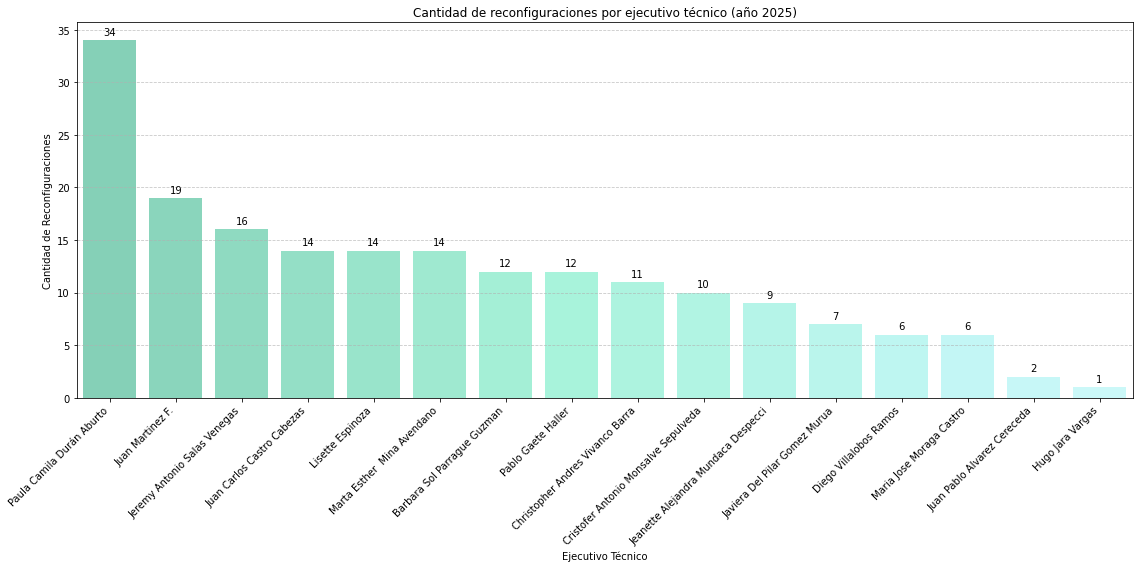

In [25]:
# --- Contar cantidad de reconfiguraciones por ejecutivo (para 2025)
conteo_ejecutivo = df_reporte_2025["Nombre_Ejecutivo_Técnico"].value_counts().reset_index()
conteo_ejecutivo.columns = ["Ejecutivo Técnico", "Cantidad"]

# --- Generar degradado desde color base CORFO #78DDBB
base_color = mcolors.to_rgb("#78DDBB")
verde_corfo = [
    mcolors.to_hex(tuple(min(1, c + i * 0.02) for c in base_color))
    for i in range(len(conteo_ejecutivo))
]

# --- Graficar
fig = plt.figure(figsize=(16, 8), facecolor='white')
ax = sns.barplot(
    data=conteo_ejecutivo,
    x="Ejecutivo Técnico",
    y="Cantidad",
    palette=verde_corfo
)

# --- Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# --- Estilo y diseño
plt.title("Cantidad de reconfiguraciones por ejecutivo técnico (año 2025)", color='black')
plt.xlabel("Ejecutivo Técnico", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()

# ✅ Guardar automáticamente
guardar_grafico(fig, 6)

plt.show()

### 7-.  **Reconfiguraciones por ejecutivo técnico e instrumento (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras apiladas expone el número total de reconfiguraciones tramitadas por cada ejecutivo técnico durante el año 2025, desglosado por instrumento INNOVA. Se construyó a partir de una tabla cruzada entre _Nombre_Ejecutivo_Técnico_ e _Instrumento Agrupado_, ordenando los resultados según el volumen total de casos gestionados.

#### 🥇 **Ejecutivos con mayor Diversidad y carga**  
📌 En todos los casos, **Crea y Valida** es el instrumento predominante. No obstante, destacan unos cuantos ejecutivos con presencia en hasta **5 instrumentos diferentes**, lo que revela su versatilidad en la gestión:
- **Juan Carlos Castro Cabezas** (14 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Capital Humano, Consolida y Expande, Gestión de la Innovación, Otros  
- **Cristofer Monsalve** (10 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Gestión de la Innovación, Consolida y Expande, Otros  
- **Juan Martinez F.** (19 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Capital Humano, Innova Alta Tecnología, Otros  



#### 🧩 **Implicancias estratégicas**  
- **Balance de carga**: Identificar quienes manejan múltiples líneas permite planificar redistribuciones para mitigar riesgos de sobrecarga y cuellos de botella.  
- **Especialización crítica**: La fuerte concentración en **Crea y Valida** confirma su centralidad, pero el reparto en otros instrumentos indica oportunidades de capacitación cruzada.  
- **Plan de desarrollo**: Ejecutivos con alta diversidad pueden liderar formaciones internas o pilotar mejoras de proceso en distintos programas.  

La combinación de este gráfico con los hallazgos anteriores (por volumen mensual y por instrumento) entrega una perspectiva integral para:  
1. Distribuir equitativamente la carga técnica.  
2. Detectar riesgos por especialización excesiva.  
3. Diseñar estrategias de capacitación y optimización de flujos.  

✅ Guardado automático: maquetas/img\grafico_7.png


<Figure size 1152x576 with 0 Axes>

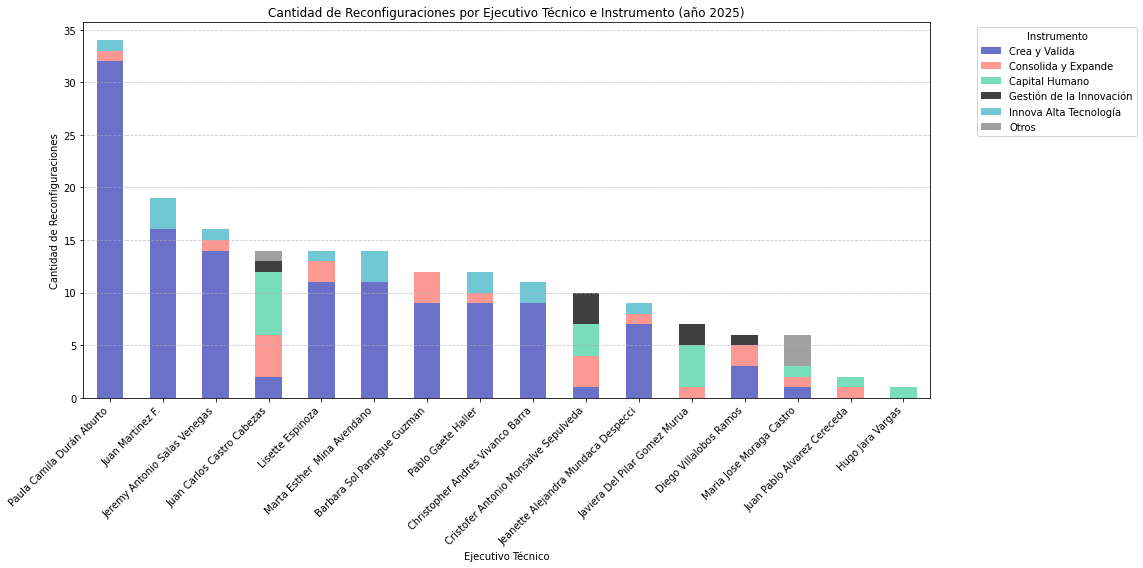

In [26]:
# Definir paleta institucional CORFO (instrumento → color)
colores_instrumentos = {
    "Crea y Valida": "#6B70C8",  # 🔵 Más claro que #221E7C
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"                  # Gris claro para categoría residual
}

# Crear tabla cruzada: ejecutivo técnico x instrumento
tabla_ejecutivo_instrumento = pd.crosstab(
    df_reporte_2025["Nombre_Ejecutivo_Técnico"],
    df_reporte_2025["Instrumento Agrupado"]
)

# Ordenar por total de reconfiguraciones
tabla_ejecutivo_instrumento = tabla_ejecutivo_instrumento.loc[
    tabla_ejecutivo_instrumento.sum(axis=1).sort_values(ascending=False).index
]

# Reordenar columnas según preferencia
column_order = [col for col in colores_instrumentos if col in tabla_ejecutivo_instrumento.columns]
tabla_ejecutivo_instrumento = tabla_ejecutivo_instrumento[column_order]

# Obtener lista de colores en el mismo orden de columnas
colores = [colores_instrumentos[col] for col in tabla_ejecutivo_instrumento.columns]

# Graficar gráfico de barras apiladas
fig = plt.figure(figsize=(16, 8), facecolor='white')
tabla_ejecutivo_instrumento.plot(
    kind="bar",
    stacked=True,
    color=colores,
    figsize=(16, 8)
)

plt.title("Cantidad de Reconfiguraciones por Ejecutivo Técnico e Instrumento (año 2025)", color='black')
plt.xlabel("Ejecutivo Técnico", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar automáticamente
fig = plt.gcf()
guardar_grafico(fig, 7)

plt.show()

### 8-. **Reconfiguraciones por tipo de notificación (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico circular muestra la distribución relativa de los tipos de notificación utilizados en las solicitudes de reconfiguración de proyectos INNOVA durante 2025 (enero–mayo). Se calcularon las proporciones con base en el total de 187 notificaciones registradas; aquí se presentan únicamente las categorías que superan el 5 % del total, para mantener la claridad visual.

#### 🥇 **Tipo de notificación más frecuente**  
- **Reitemización**: 43.3 % (81 notificaciones)  
- **Reprogramación**: 21.9 % (41 notificaciones)  
- **Rectifica**: 12.3 % (23 notificaciones)  
- **Suspensión**: 11.2 % (21 notificaciones)  
- **Reitemización y Reprogramación**: 5.9 % (11 notificaciones)  
- **Modificación de Proyecto**: 5.3 % (10 notificaciones)  

> **Observación:** La “Reitemización” lidera claramente, seguida de “Reprogramación”. Las combinaciones y las suspensiones son marginales pero relevantes, reflejando casos de ajustes tanto presupuestarios como de cronograma.

#### 🔍 **Conclusiones clave**  
- Gran concentración en dos categorías principales (Reitemización + Reprogramación = 65.2 %), lo que indica las áreas más demandantes de ajuste.  
- “Rectifica” (12.3 %) subraya la importancia de enmendar solicitudes previas rechazadas, apuntando a posibles mejoras en la revisión inicial.  
- Las demás categorías (Suspensión, combinaciones y modificación de proyecto) suman el 22.4 %, mostrando que existe un grado significativo de complejidad administrativa más allá de los dos tipos líderes.  

#### 🧩 **Complementariedad con gráficos anteriores**  
Este desglose complementa el Gráfico 6 (por ejecutivo) y el Gráfico 7 (ejecutivo × instrumento), al evidenciar qué tipos de notificación dominan la carga técnica. Permite priorizar la capacitación y la optimización de procesos hacia las solicitudes más frecuentes.  


✅ Guardado automático: maquetas/img\grafico_8.png


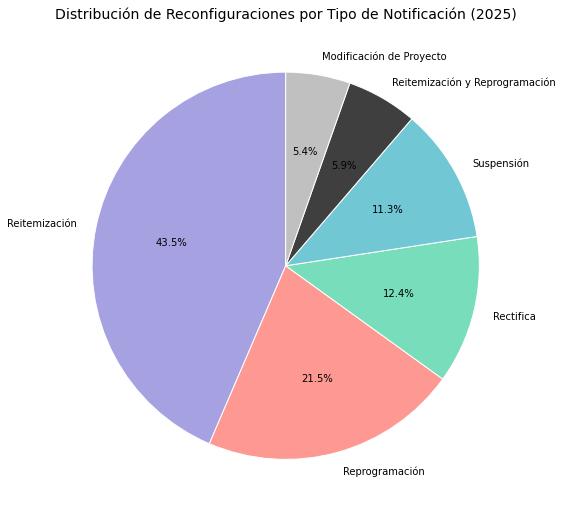

In [27]:
# Agrupar categorías con menos del 3% en "Otros"
conteo_tipo = df_reporte_2025["Tipo Notificación"].value_counts()
porcentajes = conteo_tipo / conteo_tipo.sum()

principales = porcentajes[porcentajes >= 0.05]
otros = porcentajes[porcentajes < 0.06]

conteo_resumido = principales.copy()
# conteo_resumido["Otros"] = otros.sum() # SE OPTA POR NO CONSIDERAR "Otros" EN ESTE REPORTE (JUNIO 2025)

# Detectar categoría con mayor porcentaje
categoria_max = conteo_resumido.idxmax()

# 🎨 Paleta institucional CORFO (sin repetir)
paleta_corfo = [
        "#A6A1E0",  # Morado claro institucional (para la mayor)
        "#FD9893",  # Rosado institucional
        "#78DDBB",  # Verde menta institucional
        "#72C7D5",  # Celeste institucional
        "#3F3F3F",  # Gris oscuro
        "#C0C0C0",  # Gris claro
        "#221E7C",  # Azul institucional fuerte
        "#BBBBFF"   # Lavanda de apoyo
]

# ✅ Asignar colores sin repetir
colores_dict = {}
usados = set()

for cat in conteo_resumido.index:
        if cat == categoria_max:
                colores_dict[cat] = "#A6A1E0"
                usados.add("#A6A1E0")
        else:
                for color in paleta_corfo:
                        if color not in usados:
                                colores_dict[cat] = color
                                usados.add(color)
                                break
                        else:
                                colores_dict[cat] = "#999999"  # fallback si se acaban los colores

# Lista ordenada de colores
colores = [colores_dict[cat] for cat in conteo_resumido.index]

# 📊 Gráfico pie
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.set_facecolor("white")

ax.pie(
        conteo_resumido,
        labels=conteo_resumido.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        textprops={'color': 'black'},
        wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de Reconfiguraciones por Tipo de Notificación (2025)", color='black', fontsize=14)
plt.tight_layout()

# ✅ Guardar gráfico
guardar_grafico(fig, 8)

plt.show()

### 9-. **Estado de tramitación de Reconfiguraciones (2025)**

#### 🎯 **Descripción del Análisis**  
Este gráfico de barras expone la distribución de las solicitudes de reconfiguración según su estado administrativo interno, tal como se consigna en la columna **“Situación (uso interno MC)”**, para el primer cuatrimestre de 2025 (enero–mayo).

#### ✅ **Análisis de Gestión**  
- **FINALIZADA**: 107 solicitudes (**57.2 %**) — refleja el cierre exitoso de más de la mitad de los casos.  
- **PROCESADA**: 5 solicitudes (**2.7 %**) — completadas, pero quizás sujetas a validaciones finales.  
- **Total de finalizadas/procesadas**: 112 (**59.9 %**) de las solicitudes están cerradas o tramitadas.  
- **PENDIENTE REVISIÓN TÉCNICA**: 12 solicitudes (**6.4 %**)  
- **NO GESTIONABLE**: 7 solicitudes (**3.7 %**)  
  - **Pendientes o no gestionables**: 19 casos (**10.2 %**) requieren atención o no pueden avanzar bajo el proceso estándar.  
- **PROCESAR**: 6 solicitudes (**3.2 %**) — pendientes de entrada o asignación inicial.  
- **NO APLICA**: 50 solicitudes (**26.7 %**) — incluye duplicados, anulaciones o casos fuera de alcance del proceso.

#### 🔍 **Observaciones Clave**  
- La categoría **NO APLICA** (26.7 %) sugiere un volumen significativo de casos descartados o externos al flujo de tramitación, lo que podría optimizarse reduciendo duplicidades.  
- El 59.9 % de casos finalizados o procesados indica una capacidad de respuesta razonable, pero el 10.2 % de pendientes/no gestionables y el 3.2 % en **PROCESAR** requieren seguimiento operativo.  
- Priorizar la revisión técnica de los 12 casos pendientes y la definición de protocolos para los no gestionables puede mejorar los tiempos de cierre y la eficiencia del proceso.

> **Observación clave:** Aunque más de la mitad de las solicitudes están cerradas, existe un 40.1 % aún en estados intermedios o excluidos, lo que señala oportunidades de mejora en flujo operativo y reducción de casos NO APLICA.  


✅ Guardado automático: maquetas/img\grafico_9.png


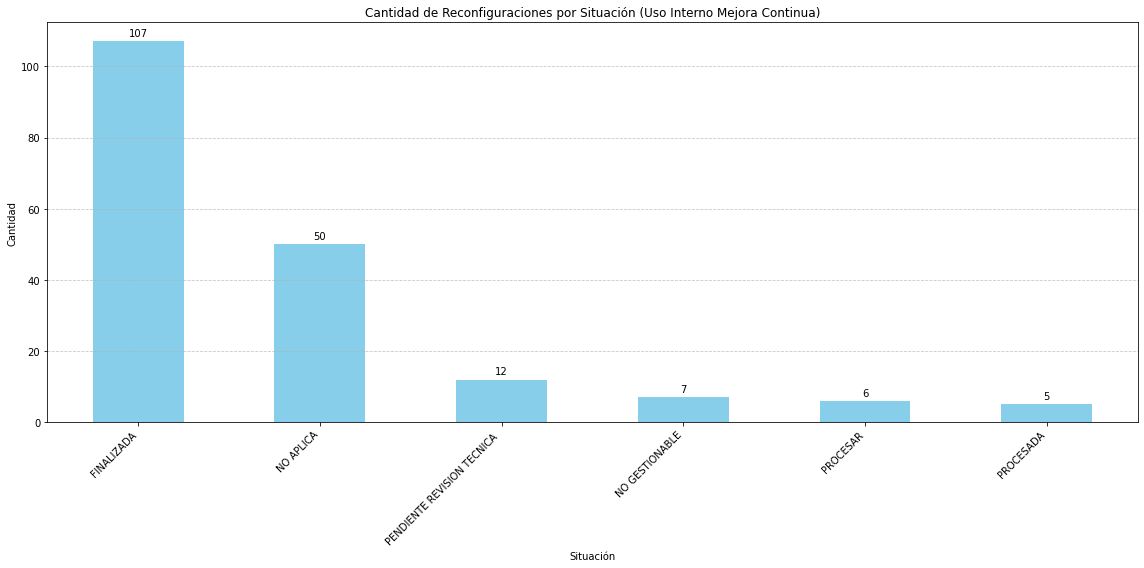

In [28]:
# Definir las categorías que queremos contar
situaciones_objetivo = [
    "PROCESAR", "NO GESTIONABLE", "NO APLICA", "PROCESADA", "PENDIENTE REVISION TECNICA ", "FINALIZADA"
]

# Filtrar y contar solo esas categorías
conteo_situaciones = df_reporte_2025["Situación (uso interno MC)"].value_counts()
conteo_filtrado = conteo_situaciones[conteo_situaciones.index.isin(situaciones_objetivo)]

# Graficar el conteo filtrado en un gráfico de barras
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
bars = conteo_filtrado.plot(kind='bar', color='skyblue', ax=ax)

plt.title("Cantidad de Reconfiguraciones por Situación (Uso Interno Mejora Continua)", color='black')
plt.xlabel("Situación", color='black')
plt.ylabel("Cantidad", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor("white")
plt.tight_layout()

# ➕ Agregar etiquetas de valor sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='black')

# ✅ Guardar el gráfico como grafico_8.png
guardar_grafico(fig, 9)

plt.show()

### 10-. **Distribución de reconfiguraciones por mes y estado (2025)**

#### 🎯 **Descripción del análisis**
Este gráfico muestra cómo se distribuyen las solicitudes de reconfiguración según su estado administrativo interno (uso interno MC) a lo largo de los primeros cuatro meses de 2025. Para ello se construyó una tabla cruzada entre el campo _Mes_ y las categorías seleccionadas de la columna _Situación (uso interno MC)_: **PROCESAR**, **NO GESTIONABLE**, **NO APLICA**, **PROCESADA**, **PENDIENTE REVISIÓN TÉCNICA** y **FINALIZADA**.

En enero y febrero la proporción de casos finalizados supera ampliamente a las pendientes o no gestionables, reflejando un arranque de año con alta eficiencia administrativa.

#### 📊 **Carga técnica y oportunidad de gestión**
Marzo y abril muestran señales de saturación operativa y un aumento de solicitudes no procedentes o con problemas documentales. Esto sugiere:  
1. **Monitoreo mensual** de casos NO GESTIONABLE y NO APLICA para depurar duplicados y optimizar flujos.  
2. **Refuerzo de capacidad** en períodos críticos (marzo) mediante redistribución de carga o apoyos temporales.  
3. **Cruce con instrumento y ejecutivo** para focalizar acciones preventivas y mantener los tiempos de cierre.

#### 🧩 **Implicancias estratégicas**
El análisis revela un desempeño operativo sólido en los dos primeros meses y alerta temprana en marzo–abril, indispensable para ajustar recursos y protocolos antes de la segunda mitad del año.  



📋 Columnas disponibles: ['FINALIZADA', 'NO APLICA', 'NO GESTIONABLE', 'PENDIENTE REVISION TECNICA ', 'PROCESADA', 'PROCESAR']
✅ Guardado automático: maquetas/img\grafico_10.png


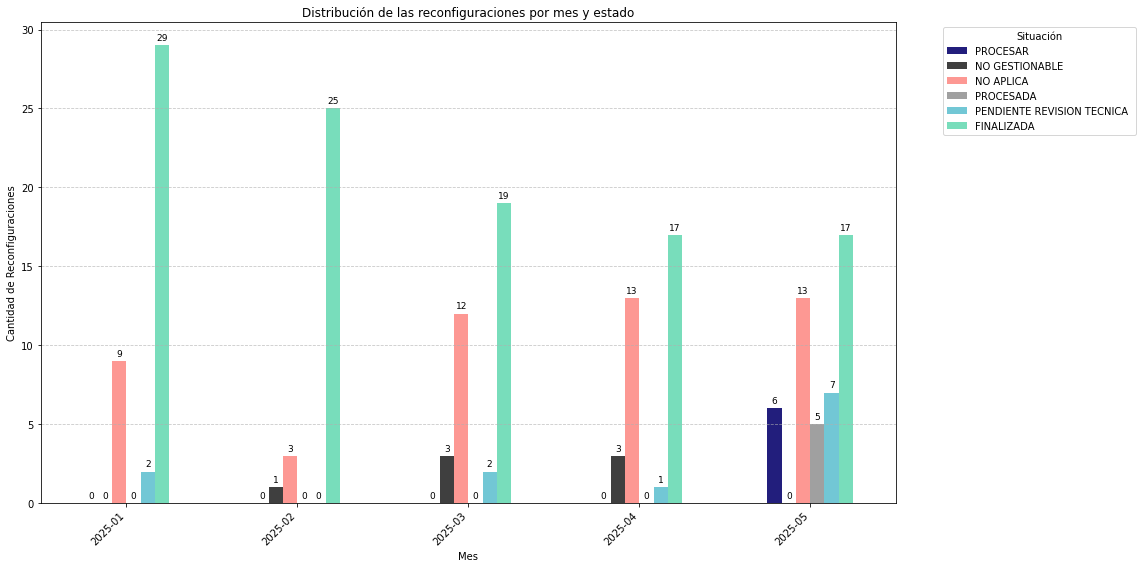

In [29]:
# Crear tabla cruzada: filas=mes, columnas=situación, valores=cantidad
tabla_situaciones = pd.crosstab(
    df_reporte_2025["Mes"],
    df_reporte_2025["Situación (uso interno MC)"]
)

# Revisar nombres reales en las columnas para evitar errores de clave
columnas_disponibles = tabla_situaciones.columns.tolist()
print("📋 Columnas disponibles:", columnas_disponibles)

# Situaciones de interés (según lo esperado)
situaciones_objetivo = ['PROCESAR', 'NO GESTIONABLE', 'NO APLICA', 'PROCESADA', 'PENDIENTE REVISION TECNICA ','FINALIZADA']

# Filtrar solo las que realmente están presentes en el DataFrame
situaciones_validas = [s for s in situaciones_objetivo if s in columnas_disponibles]
tabla_situaciones = tabla_situaciones[situaciones_validas]

# Diccionario de colores institucionales CORFO para cada situación
colores_estado = {
    "FINALIZADA": "#78DDBB",                    # Verde institucional
    "NO APLICA": "#FD9893",                     # Rosado institucional
    "NO GESTIONABLE": "#3F3F3F",                # Gris oscuro
    "PENDIENTE REVISION TECNICA ": "#72C7D5",   # Celeste
    "PROCESAR": "#221E7C",                      # Azul oscuro institucional
    "PROCESADA": "#A0A0A0"                      # Gris claro
}

# Crear gráfico de barras agrupadas con colores personalizados
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
tabla_situaciones.plot(
    kind="bar",
    stacked=False,
    color=[colores_estado[col] for col in situaciones_validas],
    ax=ax
)

plt.title("Distribución de las reconfiguraciones por mes y estado", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Situación", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ➕ Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3, color='black')

# ✅ Guardar el gráfico
guardar_grafico(fig, 10)
plt.show()
plt.show()

### 📋 **Tabla resumen 1: cartas correctas vs. cartas con errores**

#### 🎯 **Descripción del análisis**  
Esta tabla resume la cantidad total y el porcentaje relativo de cartas de reconfiguración emitidas durante el período, diferenciando si presentan errores u observaciones en su tramitación. Se usó la columna **Casuísticas errores en solicitudes** como indicador clave: si el campo estaba vacío se clasificó como “Sin errores”, y si contenía texto, como “Con errores”.

#### 🔍 **Observaciones clave**  
- **492** cartas fueron emitidas sin observaciones formales, lo que representa el **85.9%** del total.  
- **81** cartas presentaron algún error u observación, equivalente al **14.1%** del total.  
- Aunque la proporción de errores es relativamente baja, sigue siendo un segmento relevante que podría optimizarse.

#### ✅ **Implicancias para la “Mejora Continua”**  
- Mantener o reforzar los controles actuales, dado el alto porcentaje de cartas correctas.  
- Implementar revisiones focalizadas o checklists para reducir el 14.1% de cartas con errores.  
- Complementar este análisis con cruces por mes, instrumento o ejecutivo técnico para identificar patrones sistemáticos y reducir recurrencias.



In [30]:
# Clasificar los registros como "Con errores" o "Sin errores (NaN)"
df_reporte["Clasificación Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
    lambda x: "Con errores" if pd.notna(x) else "Sin errores"
)

# Generar la tabla resumen
tabla_errores_total = df_reporte["Clasificación Errores"].value_counts().reset_index()
tabla_errores_total.columns = ["Clasificación", "Cantidad"]

# Agregar columna de porcentaje
total = tabla_errores_total["Cantidad"].sum()
tabla_errores_total["Porcentaje"] = (tabla_errores_total["Cantidad"] / total * 100).round(1).astype(str) + "%"

# Mostrar tabla con título sin índice
display(Markdown("### Tabla 1: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores**"))
display(tabla_errores_total.style.hide(axis="index"))

### Tabla 1: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores**

Clasificación,Cantidad,Porcentaje
Sin errores,474,85.9%
Con errores,78,14.1%


### 📋 **Tabla resumen 2: cartas emitidas con vs. sin errores (2025)**

#### 🎯 **Objetivo del análisis**  
Esta tabla presenta un desglose exclusivo de las cartas emitidas durante el año 2025 (enero–mayo), clasificadas según la presencia de errores en el campo **Casuísticas errores en solicitudes**. Se utilizó el subconjunto `df_reporte_2025` y la columna **Clasificación Errores**, donde “Sin errores” indica campos vacíos y “Con errores” aquellos registros con texto en la casuística.

#### ⚠️ **Alto porcentaje de emisión sin errores y revisión de errores detectados**  
- **Total cartas 2025**: 187  
- **Sin errores**: 154 (82.4 %)  
- **Con errores**: 33 (17.6 %)  

Aunque el 82.4 % de cartas sin errores refleja un estándar de calidad sólido, el 17.6 % restante indica áreas de mejora, especialmente en la revisión previa y los procesos de validación técnica.

#### 🔍 **Observaciones clave**  
- La proporción de “Con errores” en 2025 (17.6 %) es ligeramente superior al promedio histórico, lo que sugiere reforzar controles preventivos.  
- Estos 33 casos deben analizarse por mes, instrumento y ejecutivo, para identificar patrones y reducir recurrencias.  
- Sería valioso incorporar un seguimiento mensual de esta métrica para evaluar el impacto de las acciones correctivas.


In [31]:
# Clasificar los registros como "Con errores" o "Sin errores (NaN)"
df_reporte_2025["Clasificación Errores"] = df_reporte_2025["Casuisticas errores en solicitudes"].apply(
    lambda x: "Con errores" if pd.notna(x) else "Sin errores"
)

# Generar la tabla resumen
tabla_errores_2025 = df_reporte_2025["Clasificación Errores"].value_counts().reset_index()
tabla_errores_2025.columns = ["Clasificación", "Cantidad"]

# Agregar columna de porcentaje
total = tabla_errores_2025["Cantidad"].sum()
tabla_errores_2025["Porcentaje"] = (tabla_errores_2025["Cantidad"] / total * 100).round(1).astype(str) + "%"

# Mostrar tabla con título y sin índice
display(Markdown("### Tabla 2: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores año 2025**"))
display(tabla_errores_2025.style.hide(axis="index"))

### Tabla 2: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores año 2025**

Clasificación,Cantidad,Porcentaje
Sin errores,154,82.4%
Con errores,33,17.6%


### 📋 **Tabla resumen 3: Clasificación detallada de tipos de errores identificados**

#### 🎯 **Descripción del análisis**  
Esta tabla presenta una desagregación específica de los tipos de errores identificados en las cartas emitidas con observaciones, agrupando las casuísticas más comunes y cuantificando su frecuencia y porcentaje dentro del total de 81 errores registrados.

#### 🔍 **Observaciones clave**  
- **Falta información adicional RRHH nuevos**: 31 casos (38.3 %)  
- **Incidencias en el cálculo presupuestario**: 25 casos (30.9 %)  
- **Error en la definición de las fechas de los informes**: 12 casos (14.8 %)  
- **Valores del presupuesto ya rendidos sin posibilidad de reitemización**: 6 casos (7.4 %)  
- **Error en la definición de RRHH y otros gastos: inconsistencia en categorías**: 3 casos (3.7 %)  
- **Falta información adicional Presupuesto**: 3 casos (3.7 %)  
- **Falta claridad en monto a reitemizar**: 1 caso (1.2 %)

In [32]:
# Filtrar solo los registros con errores (no NaN)
df_con_errores = df_reporte[df_reporte["Casuisticas errores en solicitudes"].notna()]

# Contar ocurrencias por tipología de error
tabla_errores_clasificacion_total = df_con_errores["Casuisticas errores en solicitudes"].value_counts().reset_index()
tabla_errores_clasificacion_total.columns = ["Casuística de Error", "Cantidad"]

# Agregar columna de porcentaje
total_errores = tabla_errores_clasificacion_total["Cantidad"].sum()
tabla_errores_clasificacion_total["Porcentaje"] = (tabla_errores_clasificacion_total["Cantidad"] / total_errores * 100).round(1).astype(str) + "%"

# Mostrar todo el contenido de las celdas
pd.set_option("display.max_colwidth", None)

# Mostrar con título y sin índice
display(Markdown("### Tabla 3: **Tabla de clasificación de tipos de errores identificados**"))
display(tabla_errores_clasificacion_total.style.hide(axis="index"))

### Tabla 3: **Tabla de clasificación de tipos de errores identificados**

Casuística de Error,Cantidad,Porcentaje
Falta información adicional RRHH nuevos,29,37.2%
Incidencias en el cálculo presupuestario,25,32.1%
"Error en la definición de las fechas de los informes (TÉCNICOS, AVANCE Y FINAL)",12,15.4%
Valores del presupuesto ya rendidos sin posibilidad de reitemizar,5,6.4%
Error en la definición de RRHH y otros gastos: pecuniarios y valorados,3,3.8%
Falta información adicional Presupuesto,3,3.8%
Falta claridad en monto a reitemizar,1,1.3%


In [33]:
html_folleto_estructura_inicial = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Informe de Reconfiguraciones CORFO – Año 2024-2025</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: #ffffff;
            color: #1a1a1a;
            margin: 40px;
            line-height: 1.6;
        }
        .header {
            background-color: #e9f2fb;
            padding: 30px;
            border-radius: 10px;
            margin-bottom: 40px;
        }
        .header h1 {
            color: #004a99;
            font-size: 28px;
            margin: 0;
        }
        .header h3 {
            color: #2f6fa5;
            font-size: 18px;
            margin: 0;
            font-weight: normal;
        }
        h2 {
            color: #004a99;
            margin-top: 40px;
        }
        .section {
            margin-bottom: 30px;
            text-align: justify;
        }
        .content {
            border-bottom: 1px solid #004a99;
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
            margin-bottom: 50px;
        }
        .grafico, .explicacion, .tabla {
            flex: 1;
            max-width: 45%;
        }
        .grafico img {
            max-width: 100%;
            border-radius: 8px;
            border: 1px solid #ccc;
        }
        .explicacion {
            text-align: justify;
            font-size: 13px;
            color: #333333;
        }
        .tabla {
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            font-size: 14px;
            background-color: #fff;
            box-shadow: 0 2px 5px rgba(0,0,0,0.05);
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px 10px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
        ul {
            padding-left: 20px;
        }
        ul li {
            margin-bottom: 6px;
        }
        .footer {
            text-align: center;
            font-size: 13px;
            color: #666666;
            border-top: 1px solid #ddd;
            margin-top: 60px;
            padding-top: 20px;
        }

        /* ✨ Nueva clase destacada */
        .destacada {
            background-color: #f4f9ff;
            border-left: 5px solid #004a99;
            padding: 15px;
            margin-bottom: 30px;
        }
        /* Versión móvil: reorganiza bloques para pantallas pequeñas */
        @media (max-width: 1199px) {
            .content {
                flex-direction: column;
            }

            .explicacion, .grafico, .tabla {
                order: unset;        /* se respeta orden de inserción o el especificado arriba */
                max-width: 100% !important;  /* 🔧 sobrescribe el 45% */
                width: 100%;
            }

            .grafico img {
                max-width: 100%;
                height: auto;
            }
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Informe de Reconfiguraciones de Proyectos INNOVA</h1>
        <h3>Año 2025 – Mes de Mayo. Análisis Ejecutivo</h3>
    </div>

    <!-- Este es el contenedor donde se insertará el contenido -->
    <section class="destacada"></section>
    <section class="contenido-tablas"></section>


</body>
    <div class="footer">
        Subdirección de Operaciones y Mejora Continua<br>
        Gerencia de Innovación<br>
        Corfo<br>
        2025 – Todos los derechos reservados
    </div>
</html>
"""

# # Guardar HTML base

output_path = "maquetas/html/Folleto_Final.html"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, "w", encoding="utf-8") as f:
    f.write(html_folleto_estructura_inicial)

output_path

'maquetas/html/Folleto_Final.html'

In [34]:
# --- Parámetros
notebook_path = "reporte_reconfiguraciones.ipynb"
html_template_path = "maquetas/html/Folleto_Final.html"
output_path = "maquetas/html/Folleto_Final_ConGraficos.html"

# --- Cargar HTML base
with open(html_template_path, "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f.read(), "html.parser")

# --- Cargar notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# --- Insertar primer markdown explicativo antes de los gráficos
primer_md = None
for cell in nb.cells:
    if cell.cell_type == "markdown":
        primer_md = cell.source
        break

if primer_md:
    # Buscar sección ya existente con clase "destacada"
    bloque_intro = soup.find("section", class_="destacada")
    if bloque_intro and primer_md:
        bloque_intro.append(BeautifulSoup(markdown2.markdown(primer_md), "html.parser"))
        
# --- Namespace de tablas
namespace = {
    "tabla_errores_total": tabla_errores_total,
    "tabla_errores_2025": tabla_errores_2025,
    "tabla_errores_clasificacion_total": tabla_errores_clasificacion_total,
}

# --- Crear secciones nuevas para gráficos y tablas
seccion_graficos = soup.new_tag("section")
seccion_graficos.append(soup.new_tag("h2"))
seccion_graficos.h2.string = "📊 Análisis de Gráficos"

seccion_tablas = soup.new_tag("section")
seccion_tablas.append(soup.new_tag("h2"))
seccion_tablas.h2.string = "📋 Análisis de Tablas"

# --- Recorrer bloques del notebook
i = 0
img_index = 1

while i < len(nb.cells) - 1:
    md_cell = nb.cells[i]
    code_cell = nb.cells[i + 1]

    if md_cell.cell_type == "markdown" and code_cell.cell_type == "code":
        tiene_grafico = "plt.show" in code_cell.source
        tiene_tabla = "display(" in code_cell.source and ".style" in code_cell.source

        if tiene_grafico or tiene_tabla:
            explicacion_html = f"<div class='explicacion'>{markdown2.markdown(md_cell.source)}</div>"
            grafico_html = ""
            tabla_html = ""

            # 🔷 Gráfico
            if tiene_grafico:
                ruta_local = os.path.join("maquetas/img", f"grafico_{img_index}.png")
                if os.path.exists(ruta_local):
                    with open(ruta_local, "rb") as img_file:
                        encoded = base64.b64encode(img_file.read()).decode("utf-8")
                        grafico_html = f"""
                        <div class="grafico">
                            <img src="data:image/png;base64,{encoded}">
                        </div>
                        """

            # 🔶 Tabla
            match = re.search(r'display\((\w+)\.style', code_cell.source)
            if match:
                tabla_nombre = match.group(1)
                if tabla_nombre in namespace:
                    tabla_html = f"<div class='tabla'>{namespace[tabla_nombre].to_html(index=False, escape=False)}</div>"

            # 🔽 Estructura de bloque según tipo
            bloque_html = soup.new_tag("section", **{"class": "content"})

            if tiene_grafico:
                # Gráfico a la izquierda, explicación a la derecha
                bloque_html.append(BeautifulSoup(grafico_html, "html.parser"))
                bloque_html.append(BeautifulSoup(explicacion_html, "html.parser"))
                seccion_graficos.append(bloque_html)

            if tiene_tabla:
                # Explicación a la izquierda, tabla a la derecha
                bloque_html.append(BeautifulSoup(explicacion_html, "html.parser"))
                bloque_html.append(BeautifulSoup(tabla_html, "html.parser"))
                seccion_tablas.append(bloque_html)

            img_index += 1
            i += 2
        else:
            i += 1
    else:
        i += 1

# --- Insertar secciones completas en el body del HTML
soup.body.append(seccion_graficos)
soup.body.append(seccion_tablas)

# --- Guardar HTML final
os.makedirs(os.path.dirname(output_path), exist_ok=True)
with open(output_path, "w", encoding="utf-8") as f:
    f.write(str(soup))

print("✅ HTML final generado correctamente con secciones de gráficos y tablas.")

✅ HTML final generado correctamente con secciones de gráficos y tablas.


In [35]:
# # Mostrar el dataframe df_reporte_2025 filtrado por el mes de enero 2025 y ordenado por la fecha
# df_reporte_2025_filtrado_enero = df_reporte_2025[df_reporte_2025["Mes"] == "2025-01"]
# df_reporte_2025_filtrado_enero = df_reporte_2025_filtrado_enero.sort_values(by="Fecha")
# df_reporte_2025_filtrado_enero




